In [1]:
from __future__ import division

In [2]:
# For data
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Use to grab data from the web(HTTP capabilities)
import requests

# We'll also use StringIO to work with the csv file, the DataFrame will 
#require a .read() method
from io import StringIO

In [92]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [93]:
# Set poll data as pandas DataFrame
poll_df = pd.read_csv(poll_data)

In [34]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [35]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [36]:
poll_df.isnull().count()

Pollster                  586
Start Date                586
End Date                  586
Entry Date/Time (ET)      586
Number of Observations    586
Population                586
Mode                      586
Obama                     586
Romney                    586
Undecided                 586
Other                     586
Pollster URL              586
Source URL                586
Partisan                  586
Affiliation               586
Question Text             586
Question Iteration        586
dtype: int64

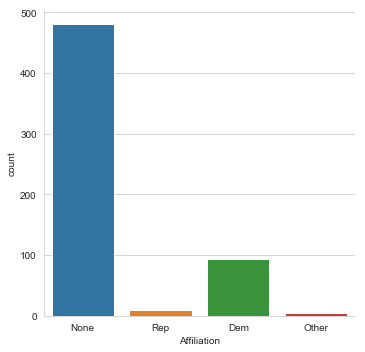

In [37]:
# lets check affiliation
sns.catplot('Affiliation',data=poll_df,kind='count')
plt.show()

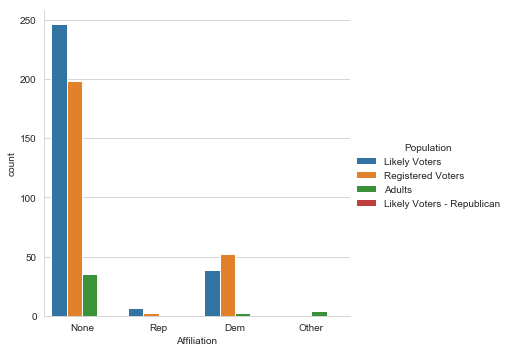

In [38]:
# lets use catplot of Affiliation according to Population
sns.catplot('Affiliation', data=poll_df,hue='Population',kind='count')
plt.show()

Looks like we have a strong showing of likely voters and Registered Voters, so the poll data should hopefully be a good reflection on the populations polled. Let's take another quick overview of the DataFrame.

#### Making two dataframes i.e 1-with average values , 
#### 2-with std values

In [68]:
# First we'll get the average of all entries in the data frame
avg = pd.DataFrame(poll_df.mean()) 

In [40]:
avg.head(6)

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


In [69]:
# now drop the column called "Number of Observations"
avg.drop('Number of Observations',axis=0,inplace=True)

In [32]:
avg.head(6)

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [70]:
# After that let's get the standard deviation
std = pd.DataFrame(poll_df.std())
std.head()

,0
Number of Observations,1621.268369
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


In [71]:
std.drop('Number of Observations',axis=0,inplace=True)

In [72]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN


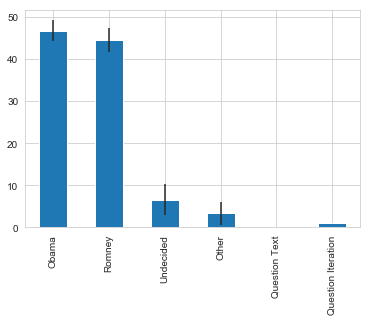

In [75]:
# now plot using pandas built-in plot, with kind='bar' and yerr='std'
avg.plot(yerr=std,kind='bar',legend=False)
plt.show()

Interesting to see how close these polls seem to be, especially considering the undecided factor. Let's take a look at the numbers.

#### Joining  Average and Std DataFrames

In [76]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN


In [77]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN


In [78]:
poll_avg=pd.concat([avg,std],axis=1)

In [79]:
poll_avg.head()

,0,0
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN


In [80]:
# rename the colmn
poll_avg.columns=['Average','STD']

In [81]:
poll_avg.head()

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN


Looks like the polls indicate it as a fairly close race, but what about the undecided voters? Most of them will likely vote for one of the candidates once the election occurs. If we assume we split the undecided evenly between the two candidates the observed difference should be an unbiased estimate of the final difference

In [91]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


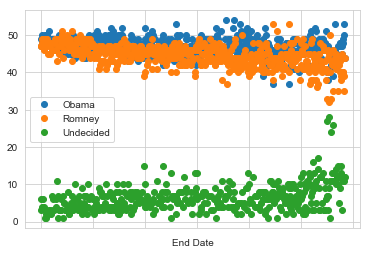

In [95]:
# Quick plot of sentiment in the polls versus time.
fig=poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

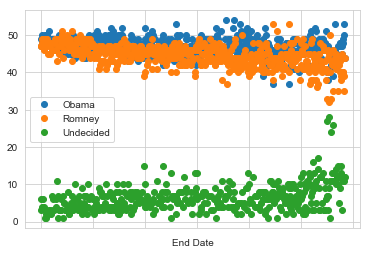

In [96]:
poll_df.plot(x='End Date',y=['Obama','Romney','Undecided'],marker='o',linestyle='')

This may give us  a quick idea.We will make some more clear visualization .
To lead you along the right path for plotting, we'll go ahead and answer another question related to plotting the sentiment versus time. Let's go ahead and plot out the difference between Obama and Romney and how it changes as time moves along. Remember from the last data project we used the datetime module to create timestamps, let's go ahead and use it now.

Now we check the Sentiment from the "Start Date" and get the %ge difference between Obama and Romney

In [85]:
# Recall datetime conversion
from datetime import datetime
date_str1 = 'Wednesday, June 6, 2018'
date_str2 = '6/6/18'
date_str3 = '06-06-2018'

# Define dates as datetime objects
date_dt1 = datetime.strptime(date_str1, '%A, %B %d, %Y')
date_dt2 = datetime.strptime(date_str2, '%m/%d/%y')
date_dt3 = datetime.strptime(date_str3, '%m-%d-%Y')

# Print converted dates
print(date_dt1)
print(date_dt2)
print(date_dt3)

2018-06-06 00:00:00
2018-06-06 00:00:00
2018-06-06 00:00:00


In [101]:
# new column "Difference" which has the percentage difference between two candidates
poll_df['Difference']=(poll_df['Obama'] -poll_df['Romney'])/100
poll_df['Difference'].head()

0    0.00
1    0.11
2    0.18
3    0.08
4    0.09
Name: Difference, dtype: float64

see if we can visualize how this sentiment in difference changes over time. We will start by using groupby to group the polls by their start data and then sorting it by that Start Date.

In [107]:
# For timestamps
from datetime import datetime

In [108]:
poll_df=poll_df.groupby(['Start Date'],as_index=False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


Now plotting the Differencce versus time should be straight forward

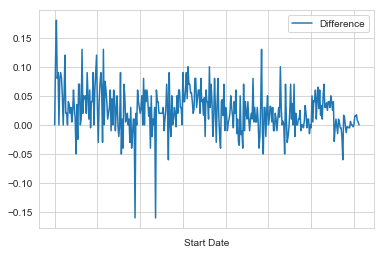

In [109]:
fig=poll_df.plot('Start Date','Difference')

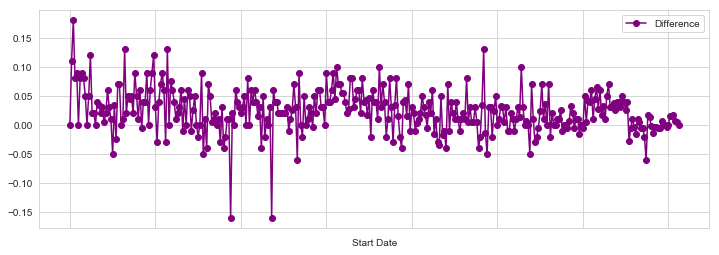

In [110]:
fig=poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

It would be very interesting to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Oct 3rd, Oct 11, and Oct 22nd. Let's plot some lines as markers and then zoom in on the month of October.

In [122]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


In [124]:
poll_df['Start Date'].head()

0    2009-03-13
1    2009-04-17
2    2009-05-14
3    2009-06-12
4    2009-07-15
Name: Start Date, dtype: object

In [127]:
row_in=0 # it will just count the index row for us
xlimit=[]
# running through the index of start date
for date in poll_df['Start Date']:
    #check the first 7 character if they are equal to 2012-10..i.e 
    if date[0:7]=='2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1 # keep on iterating and increase the count whether u find 
        # the required string or not
print(min(xlimit)) # so this is start index of October
print(max(xlimit))
        

325
352


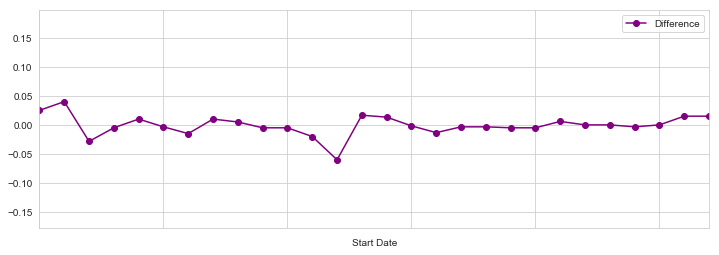

In [129]:
fig=poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))

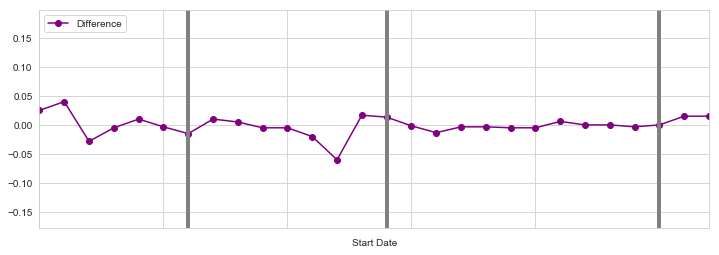

In [130]:
# now adding the debate dates markers
fig=poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))
# here adding the debate dates markers
plt.axvline(x=329+2, linewidth=4, color='grey')
plt.axvline(x=329+10, linewidth=4, color='grey')
plt.axvline(x=329+21, linewidth=4, color='grey')

Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though memory serves that he performed much worse against Romney during the first debate.